<a id='Top'></a>
# CLASSIFICATION CHALLENGE

© Explore Data Science Academy

---


###   Predict Overview: Climate Change Belief Analysis 2022

Many companies are built around lessening one’s environmental impact or carbon footprint. They offer products and services that are environmentally friendly and sustainable, in line with their values and ideals. They would like to determine how people perceive climate change and whether or not they believe it is a real threat. This would add to their market research efforts in gauging how their product/service may be received.

With this context, EDSA is challenging you during the Classification Sprint with the task of creating a Machine Learning model that is able to classify whether or not a person believes in climate change, based on their novel tweet data.

Providing an accurate and robust solution to this task gives companies access to a broad base of consumer sentiment, spanning multiple demographic and geographic categories - thus increasing their insights and informing future marketing strategies.

---


<a id="cont"></a>

## Table of Contents

<a href=#one>1. INTRODUCTION</a>
* <a href=#oneq>[Problem Statement](#problemstament)
* [Project Objectives](#po)
* [Definition of Data Features](#dotrain_eda)
* [Starting a Comet experiment](#StartingaCometexperiment)

<a href=#two>2. Import necessary libraries</a>

<a href=#three>3. Loading Datasets</a>

<a href=#four>4. Data Preprocessing (Cleaning)</a>

<a href=#five>5. Exploratory Data Analysis (EDA)</a>

<a href=#seven>6. Data or feature Engineering</a>
* [TF-IDF](#tfidf)
* [WORD2VEC](word2vec)

<a href=#six>6. Classification Model</a>



<a href=#seven>7. Pipelines</a>
  * [Building Classification Pipelines](#classifiers)
  * [Using Word2Vec](#pipe_word2vec)

<a href=#seven>7. Modelling and Evaluation</a>
  * [Modelling - Raw tweets](#raw_tweets)
  * [Modelling - Cleaned tweets](#clean_tweets)
  * [Model perfomance (raw tweets vs cleaned tweets)](#rvc)
  * [Model perfomance (tfidf vs word2vec)](tfidfvsword2vec)

  
<a href=#Eight>8. Ensemble Method</a>

<a href=#Nine>9. Selecting the best model</a>

<a href=#Ten>10. Predictions</a>

<a href=#Eleven>11. Submission</a>

<a href=#Twelve>12. conclusion</a>

<a href=#Thirteen>13. appendix</a>

<a href=#Fourteen>14. references</a>



    
    


 <a id="one"></a>
## 1. INTRODUCTION
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: INTRODUCTION ⚡ |
| :--------------------------- |
| We will address the problem statement and objectives, as well as the classification of data aspects and a brief discussion of the Climate Change Belief Analysis in this part.|

Companies are built with the goal of reducing one's environmental effect or carbon footprint. They provide ecologically friendly and sustainable goods and services that are in alignment with their principles and goals. They want to know how people feel about climate change and if they believe it is a serious threat.

 <a id="problemstament"></a> 
### 1.1 Problem Statement.

Create a Natural Language Processing model based on a particular twitter data to classify whether or not a person believes in climate change.

### 1.2 Project Objectives

* Clean the dataset so that it may be utilized for model development.

* Create a variety of models to identify whether or not someone believes in climate change.

* Using the provided Test Data, assess the model's accuracy in making predictions.

* Pick the best model for determining whether or not someone believes in climate change.

* Advise companies on the best strategy to determine if people believe in climate change and whether it is a serious concern.

### 1.3 Definition of Data Features

Chris Bauch of the University of Waterloo received a Canada Foundation for Innovation JELF Grant to acquire these data. The collection includes tweets about climate change that were gathered between April 27, 2015 and February 21, 2018. There were 43943 tweets in total. Each tweet is assigned to one of the classes below:

#### I. Class Description
* 2 News: the tweet links to factual news about climate change
* 1 Pro: the tweet supports the belief of man-made climate change
* 0 Neutral: the tweet neither supports nor refutes the belief of man-made climate change
* -1 Anti: the tweet does not believe in man-made climate change

#### II. Variable definitions
- sentiment: Sentiment of tweet
- message: Tweet body
- tweetid: Twitter unique id

### 1.4 Starting a Comet experiment
<img src="https://www.comet.ml/images/logo_comet_light.png" width="350" alt="Drawing" style="width: 350px;"/>

We will be using Comet as a form of version control throughout the development of our model

In [267]:
from comet_ml import Experiment

In [268]:
# Creating an experiment with your api key
experiment = Experiment(
    api_key="bEFY9Hn1QccermEDT6aTyQMOA",
    project_name="siders-analytics-zf5",
    workspace="kojosbk",
)

COMET WARNING: Comet has disabled auto-logging functionality as it has been imported after the following ML modules: sklearn, lightgbm, xgboost. Metrics and hyperparameters can still be logged using comet_ml.log_metrics() and comet_ml.log_parameters()
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/kojosbk/siders-analytics-zf5/f0144276f77246c19d88afe213062c3e



 <a id="two"></a>
## 2. Import necessary libraries
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Import necessary libraries ⚡ |
| :--------------------------- |
| We'd be importing all of the necessary libraries for the notebook to run smoothly..|



In [269]:
# imports for data visualisation

import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()
from textblob import TextBlob
from nltk.probability import FreqDist
from wordcloud import WordCloud, ImageColorGenerator
import plotly.express as px

# imports for Natural Language  Processing
import pandas as pd
import numpy as np
import nltk
import string
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize

# imports model prosessing
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from xgboost import XGBRFClassifier
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

# imports Checking Acuracy
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report
from scikitplot.metrics import plot_roc, plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.metrics import plot_roc_curve

# imports for other libraires
import pickle
import unicodedata
import warnings
warnings.filterwarnings("ignore")
import en_core_web_sm
import spacy





import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline




<a id="Three"></a>
## 3. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| The data from the `train` file is loaded into a DataFrame in this section.. |

---

To start importing our data, make sure the raw data and notebook file are both in the same folder on our local system. Using the code below, we'll load the train data sets into our notebook. If the files aren't in the same folder, we'll have to point to the directory on our machine . To check that the data has loaded correctly, it is a good practice to call up the loaded data after it has been loaded.
The information would be saved in two different data frames, one for training and testing and the other for our EDA.

In [270]:
# Importing the train & test data sets
train = pd.read_csv('train.csv')
test = pd.read_csv('test_with_no_labels.csv')

# EDA Datasets
train_eda = pd.read_csv('train.csv')
test_eda = pd.read_csv('test_with_no_labels.csv')
train_eda.head()

,sentiment,message,tweetid
0,1,"PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yeLvcEFXkC via @mashable",625221
1,1,It's not like we lack evidence of anthropogenic global warming,126103
2,2,RT @RawStory: Researchers say we have three years to act on climate change before it’s too late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT…,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change https://t.co/44wOTxTLcD,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #ElectionNight",466954


#### 2.1 Set Pandas to enable viewing of all columns
Due to the length of th content of the message column, pandas cannot display all of them at once by default. While doing EDA and data cleansing, we will need to see all of the columns. When the dataframe is presented, the code below allows us to see the whole set of columns in our data collection. 

In [271]:
# Set option to display all columns
pd.set_option('display.max_colwidth', None)

#### 2.2 Check the "Shape" of the data-sets
As demonstrated by the shape of both datasets, the data has been separated into two sets. The form also shows that the training data set has three columns, but the test data set has just two. Our model is designed to forecast the column that is not present in the test set. We can look for that specific item by looking for the missing entity (Column) in the test data set. After looking at both datasets, the column may be identified as the sentiment column.

In [272]:
train_eda.shape, test_eda.shape

((15819, 3), (10546, 2))

#### 2.2.1 Use the ".column" function to view the columns in our data set;
The number of columns and rows in our data set were revealed by the shape method, but the.columns function provides the names of all the columns in the dataframe.

In [273]:
train_eda.columns, test_eda.columns

(Index(['sentiment', 'message', 'tweetid'], dtype='object'),
 Index(['message', 'tweetid'], dtype='object'))

<a id="four"></a>
## 4. Data Preprocessing (Cleaning)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

| ⚡ Description: Data Cleaning ⚡ |
| :--------------------------- |
| In this phase, we'll convert the data into a readable and desired format, as well as filter out the most relevant information.. |
# 

#### 3.1 Identifying Missing Values

It is important to identify the columns that have null entries as null values can affect the performance of our model. The "isnull" function shows the number of null values that are contained in each column of the dataset. This data set is relatively clean as this function shows that only the column "Valencia_pressure" features null values.

In [274]:
#making a copy of the dataframe
train_data = train.copy()
test_data = test.copy()

#Cheching if there are missing values in the Train dataset
train.isna().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

In [275]:
#Cheching if there are missing values in the Test dataset
test.isna().sum()

message    0
tweetid    0
dtype: int64

#### 3.2 Removing Mentions

After the @ symbol, the code extracts all characters (a-z for lower letters, A-Z for capital letters, 0-9 for any number, and an underscore because Twitter supports underscores in usernames). Then it will come to a halt if it encounters any character other than those listed in the brackets, such as a whitespace.

In [276]:
train['message'] = train['message'].str.replace('@[A-Za-z0-9]+\s?', '', regex=True)
train.head()


,sentiment,message,tweetid
0,1,"PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yeLvcEFXkC via",625221
1,1,It's not like we lack evidence of anthropogenic global warming,126103
2,2,RT : Researchers say we have three years to act on climate change before it’s too late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT…,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change https://t.co/44wOTxTLcD,573736
4,1,"RT : It's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #ElectionNight",466954


#### 3.3 Removing Hashtags

After the # sign, the code extracts all characters (a-z for lower letters, A-Z for capital letters, 0-9 for any number, and an underscore because Twitter supports underscores in usernames). Then it will come to a halt if it encounters any character other than those listed in the brackets, such as a whitespace.

In [277]:
train['message'] = train['message'].str.replace('#[A-Za-z0-9]+\s?', '', regex=True)
train.head()

,sentiment,message,tweetid
0,1,"PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yeLvcEFXkC via",625221
1,1,It's not like we lack evidence of anthropogenic global warming,126103
2,2,RT : Researchers say we have three years to act on climate change before it’s too late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT…,698562
3,1,# WIRED : 2016 was a pivotal year in the war on climate change https://t.co/44wOTxTLcD,573736
4,1,"RT : It's 2016, and a racist, sexist, climate change denying bigot is leading in the polls.",466954


#### 3.4 Removing accented characters
 
Accented characters/letters are common in text corpora, especially if you are simply interested in studying the English language. As a result, we must ensure that these characters are transformed to ASCII characters and standardized. Converting é to e is a simple example.

In [278]:
train['message'] = train['message'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
train.tail()

,sentiment,message,tweetid
15814,1,"RT : They took down the material on global warming, LGBT rights, and health care. But now they're hocking Melania's QVC. https://...",22001
15815,2,RT : How climate change could be breaking up a 200-million-year-old relationship https://t.co/rPFGvb2pLq,17856
15816,0,notiven: RT: nytimesworld :What does Trump actually believe about climate change? Rick Perry joins other aides in ... https://t.co/0Mp2,384248
15817,-1,RT : Hey liberals the climate change crap is a hoax that ties to .\nThe Climate is Being Changed byAaA,819732
15818,0,RT _Cannon: .'s 'climate change equation' in 4 screenshots https://t.co/lp7UufcxDQ,806319


#### 3.5 Removing HTML tags
 
Unstructured text frequently contains a lot of noise. HTML tags are a good example of a component that doesn't offer much to the interpretation and analysis of content.

In [279]:
train['message'] = train['message'].str.replace(r'<[^<>]*>', '', regex=True)
train.tail()

,sentiment,message,tweetid
15814,1,"RT : They took down the material on global warming, LGBT rights, and health care. But now they're hocking Melania's QVC. https://...",22001
15815,2,RT : How climate change could be breaking up a 200-million-year-old relationship https://t.co/rPFGvb2pLq,17856
15816,0,notiven: RT: nytimesworld :What does Trump actually believe about climate change? Rick Perry joins other aides in ... https://t.co/0Mp2,384248
15817,-1,RT : Hey liberals the climate change crap is a hoax that ties to .\nThe Climate is Being Changed byAaA,819732
15818,0,RT _Cannon: .'s 'climate change equation' in 4 screenshots https://t.co/lp7UufcxDQ,806319


#### 3.6 Panding Contractions
 
Words or syllables are abbreviated in contractions. In the English language, they are frequently found in both written and spoken form. By deleting key letters and sounds, these shorter versions or contractions of words are generated. In the case of English contractions, one of the vowels is frequently removed from the word. "Do not" becomes "don't," while "I would" becomes "I'd." Text standardization is aided by converting each contraction to its enlarged, original form.


In [280]:
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase



In [281]:
train['message'] = train['message'].apply(decontracted)
train.head()

,sentiment,message,tweetid
0,1,"PolySciMajor EPA chief does not think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yeLvcEFXkC via",625221
1,1,It is not like we lack evidence of anthropogenic global warming,126103
2,2,RT : Researchers say we have three years to act on climate change before its too late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT...,698562
3,1,# WIRED : 2016 was a pivotal year in the war on climate change https://t.co/44wOTxTLcD,573736
4,1,"RT : It is 2016, and a racist, sexist, climate change denying bigot is leading in the polls.",466954


#### 3.7 Removing URLs

There is often a lot of noise in unstructured text. URL tags are an example of a component that doesn't provide much in the way of content interpretation and analysis.

In [282]:
train['message'] = train['message'].str.replace('http\S+|www.\S+', '', case=False)
train['message'] = train['message'].str.replace(r's*https?://S+(s+|$)', ' ',case=False).str.strip()

train.head(789)

,sentiment,message,tweetid
0,1,"PolySciMajor EPA chief does not think carbon dioxide is main cause of global warming and.. wait, what!? via",625221
1,1,It is not like we lack evidence of anthropogenic global warming,126103
2,2,RT : Researchers say we have three years to act on climate change before its too late,698562
3,1,# WIRED : 2016 was a pivotal year in the war on climate change,573736
4,1,"RT : It is 2016, and a racist, sexist, climate change denying bigot is leading in the polls.",466954
...,...,...,...
784,1,RT : 'What If We Create a Better World For Nothing?' Still my favourite climate change commentary by cartoon:,910349
785,0,E o Trump acha que nada estAA acontecendo. AA EA RT : The effects of global warming,777842
786,2,"RT : From a film about climate change by a 15-year-old to India is new seat at the World Bank, here are today is stories",353945
787,1,RT : Using palaeoecological data increases magnitude of predicted plant species response to climate changeAaA,380264


#### 3.8 Removing Punctuations

In textual data, there is generally a lot of noise. Punctuations are an example of a component that offers nothing in the way of textual analysis and interpretation. Performing this operation aids in text uniformity.


In [283]:
def remove_punc(x):
  x = re.sub(r"([^A-Za-z0-9]+)"," ",x)
  return x

train['message'] = train['message'].map(lambda x: remove_punc(str(x)))

In [284]:
train.head(789)

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief does not think carbon dioxide is main cause of global warming and wait what via,625221
1,1,It is not like we lack evidence of anthropogenic global warming,126103
2,2,RT Researchers say we have three years to act on climate change before its too late,698562
3,1,WIRED 2016 was a pivotal year in the war on climate change,573736
4,1,RT It is 2016 and a racist sexist climate change denying bigot is leading in the polls,466954
...,...,...,...
784,1,RT What If We Create a Better World For Nothing Still my favourite climate change commentary by cartoon,910349
785,0,E o Trump acha que nada estAA acontecendo AA EA RT The effects of global warming,777842
786,2,RT From a film about climate change by a 15 year old to India is new seat at the World Bank here are today is stories,353945
787,1,RT Using palaeoecological data increases magnitude of predicted plant species response to climate changeAaA,380264


#### 3.9 Removing Special Characters
 
Non-alphanumeric characters or, on rare occasions, numeric characters are used as special characters and symbols in unstructured text, adding to the added noise. Simple regular expressions (regexes) may usually be utilized to get rid of them.

In [285]:

def remove_special_characters(text, remove_digits=False):
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text = re.sub(pattern, '', text)
    return text

In [286]:
train['message'] = train['message'].apply(remove_special_characters)
train.head(789)

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief does not think carbon dioxide is main cause of global warming and wait what via,625221
1,1,It is not like we lack evidence of anthropogenic global warming,126103
2,2,RT Researchers say we have three years to act on climate change before its too late,698562
3,1,WIRED 2016 was a pivotal year in the war on climate change,573736
4,1,RT It is 2016 and a racist sexist climate change denying bigot is leading in the polls,466954
...,...,...,...
784,1,RT What If We Create a Better World For Nothing Still my favourite climate change commentary by cartoon,910349
785,0,E o Trump acha que nada estAA acontecendo AA EA RT The effects of global warming,777842
786,2,RT From a film about climate change by a 15 year old to India is new seat at the World Bank here are today is stories,353945
787,1,RT Using palaeoecological data increases magnitude of predicted plant species response to climate changeAaA,380264


#### 3.10 Tokenization
A tokeniser breaks text into a series of tokens that are roughly equivalent to "words." Tokenisers will be used to clean up the data and make it ready for analysis.

In [287]:
nltk.download('punkt')

train['message'] = train['message'].apply(word_tokenize)
train.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Silas_Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,sentiment,message,tweetid
0,1,"[PolySciMajor, EPA, chief, does, not, think, carbon, dioxide, is, main, cause, of, global, warming, and, wait, what, via]",625221
1,1,"[It, is, not, like, we, lack, evidence, of, anthropogenic, global, warming]",126103
2,2,"[RT, Researchers, say, we, have, three, years, to, act, on, climate, change, before, its, too, late]",698562
3,1,"[WIRED, 2016, was, a, pivotal, year, in, the, war, on, climate, change]",573736
4,1,"[RT, It, is, 2016, and, a, racist, sexist, climate, change, denying, bigot, is, leading, in, the, polls]",466954


#### 3.11 Removing Retweets

We remove some more noise by deleting the "RT"

In [288]:
retweet = 'RT'
train['message'] = train['message'].apply(lambda x: [word for word in x if word not in retweet])
train.head(10)

,sentiment,message,tweetid
0,1,"[PolySciMajor, EPA, chief, does, not, think, carbon, dioxide, is, main, cause, of, global, warming, and, wait, what, via]",625221
1,1,"[It, is, not, like, we, lack, evidence, of, anthropogenic, global, warming]",126103
2,2,"[Researchers, say, we, have, three, years, to, act, on, climate, change, before, its, too, late]",698562
3,1,"[WIRED, 2016, was, a, pivotal, year, in, the, war, on, climate, change]",573736
4,1,"[It, is, 2016, and, a, racist, sexist, climate, change, denying, bigot, is, leading, in, the, polls]",466954
5,1,"[Worth, a, read, whether, you, do, or, do, not, believe, in, climate, change]",425577
6,1,"[Mike, Pence, doesnt, believe, in, global, warming, or, that, smoking, causes, lung, cancer]",294933
7,1,"[Six, big, things, we, can, ALL, do, today, to, fight, climate, change, or, how, to, be, a, climate, activistAaA, hAaA]",992717
8,1,"[My, 8yo, nephew, is, inconsolable, He, wants, to, die, of, old, age, like, me, but, will, perish, in, the, fiery, hellscape, of, climate, change]",664510
9,1,"[no, offense, but, like, how, do, you, just, not, believe, in, global, warming]",260471


#### 3.12 Conversion to Lower case

we make all the text lower case to remove some noise from capitalisation.

In [289]:
train['message'] = train['message'].apply(lambda x: [word.lower() for word in x])
train.head()

,sentiment,message,tweetid
0,1,"[polyscimajor, epa, chief, does, not, think, carbon, dioxide, is, main, cause, of, global, warming, and, wait, what, via]",625221
1,1,"[it, is, not, like, we, lack, evidence, of, anthropogenic, global, warming]",126103
2,2,"[researchers, say, we, have, three, years, to, act, on, climate, change, before, its, too, late]",698562
3,1,"[wired, 2016, was, a, pivotal, year, in, the, war, on, climate, change]",573736
4,1,"[it, is, 2016, and, a, racist, sexist, climate, change, denying, bigot, is, leading, in, the, polls]",466954


#### 3.13 Removing Stopwords

Stop words are terms that should not be used in Search Queries since they have no significant meaning. These terms are usually kept out of search searches since they return a lot of irrelevant data. Stopwords are found in the corpus of `nltk`. Let's make a list of English stopwords.

In [290]:
nltk.download('stopwords')

", ".join(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Silas_Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [291]:
#The following lamda function removes all of the English stopwords from the input text.
stop_words = set(stopwords.words('english'))
train['message'] = train['message'].apply(lambda x: [word for word in x if word not in stop_words])
train.head(989)

,sentiment,message,tweetid
0,1,"[polyscimajor, epa, chief, think, carbon, dioxide, main, cause, global, warming, wait, via]",625221
1,1,"[like, lack, evidence, anthropogenic, global, warming]",126103
2,2,"[researchers, say, three, years, act, climate, change, late]",698562
3,1,"[wired, 2016, pivotal, year, war, climate, change]",573736
4,1,"[2016, racist, sexist, climate, change, denying, bigot, leading, polls]",466954
...,...,...,...
984,2,"[heres, damage, trump, could, realistically, global, climate, change, agreements]",311184
985,1,"[tweeting, climate, change, real, name, face, everything, every, hateful, reply, anonymo]",937202
986,-1,"[trump, 15, trillion, al, gore, save, earth, tho, global, warming, ice, age, fatties]",241108
987,-1,"[climate, change, bullshit, cofounder, greenpeace, even, said, wrong, suns, activity, faaa]",192772


#### 3.14 Lemmatization

Lemmatization is a process that is quite similar to stemming. The process of lemmatizing is the grouping of words with related meanings. So, while you can't look up your root stem (the word you end up with) in a dictionary, you can look up a lemma.

In [292]:
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

wnl = WordNetLemmatizer()

def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
train['pos_tags'] = train['message'].apply(nltk.tag.pos_tag)
train['wordnet_pos'] = train['pos_tags'].apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])

train['message'] = train['wordnet_pos'].apply(lambda x: [wnl.lemmatize(word, tag) for word, tag in x])
train.head()

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Silas_Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Silas_Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,sentiment,message,tweetid,pos_tags,wordnet_pos
0,1,"[polyscimajor, epa, chief, think, carbon, dioxide, main, cause, global, warm, wait, via]",625221,"[(polyscimajor, JJ), (epa, NN), (chief, NN), (think, VBP), (carbon, NN), (dioxide, NN), (main, JJ), (cause, NN), (global, JJ), (warming, VBG), (wait, NN), (via, IN)]","[(polyscimajor, a), (epa, n), (chief, n), (think, v), (carbon, n), (dioxide, n), (main, a), (cause, n), (global, a), (warming, v), (wait, n), (via, n)]"
1,1,"[like, lack, evidence, anthropogenic, global, warming]",126103,"[(like, IN), (lack, NN), (evidence, NN), (anthropogenic, JJ), (global, JJ), (warming, NN)]","[(like, n), (lack, n), (evidence, n), (anthropogenic, a), (global, a), (warming, n)]"
2,2,"[researcher, say, three, year, act, climate, change, late]",698562,"[(researchers, NNS), (say, VBP), (three, CD), (years, NNS), (act, JJ), (climate, JJ), (change, NN), (late, RB)]","[(researchers, n), (say, v), (three, n), (years, n), (act, a), (climate, a), (change, n), (late, r)]"
3,1,"[wired, 2016, pivotal, year, war, climate, change]",573736,"[(wired, JJ), (2016, CD), (pivotal, JJ), (year, NN), (war, NN), (climate, NN), (change, NN)]","[(wired, a), (2016, n), (pivotal, a), (year, n), (war, n), (climate, n), (change, n)]"
4,1,"[2016, racist, sexist, climate, change, deny, bigot, lead, poll]",466954,"[(2016, CD), (racist, NN), (sexist, NN), (climate, NN), (change, NN), (denying, VBG), (bigot, VBD), (leading, VBG), (polls, NNS)]","[(2016, n), (racist, n), (sexist, n), (climate, n), (change, n), (denying, v), (bigot, v), (leading, v), (polls, n)]"


Most Frequent Words

In [293]:
from collections import Counter
cnt = Counter()
for message in train['message'].values:
    for word in message:
        cnt[word] += 1
        
cnt.most_common()

[('change', 12721),
 ('climate', 12663),
 ('global', 3791),
 ('warming', 2344),
 ('trump', 2301),
 ('believe', 1309),
 ('warm', 1252),
 ('u', 1053),
 ('say', 1025),
 ('think', 1002),
 ('amp', 940),
 ('go', 882),
 ('world', 732),
 ('real', 721),
 ('make', 669),
 ('fight', 633),
 ('people', 623),
 ('president', 568),
 ('scientist', 547),
 ('new', 545),
 ('via', 541),
 ('epa', 532),
 ('cause', 520),
 ('like', 480),
 ('die', 463),
 ('science', 444),
 ('aaa', 439),
 ('year', 420),
 ('denier', 414),
 ('know', 412),
 ('right', 405),
 ('hoax', 398),
 ('get', 397),
 ('donald', 390),
 ('need', 387),
 ('take', 371),
 ('want', 350),
 ('would', 348),
 ('deny', 338),
 ('call', 336),
 ('elect', 324),
 ('action', 324),
 ('husband', 317),
 ('could', 316),
 ('human', 309),
 ('one', 304),
 ('time', 302),
 ('stop', 302),
 ('china', 290),
 ('man', 277),
 ('talk', 275),
 ('tell', 270),
 ('big', 269),
 ('news', 269),
 ('issue', 265),
 ('thing', 255),
 ('look', 253),
 ('energy', 249),
 ('see', 244),
 ('help',

Separate Datframes of Tweets for each Sentiment

In [294]:
train.sentiment.value_counts()

 1    8530
 2    3640
 0    2353
-1    1296
Name: sentiment, dtype: int64

<a id="five"></a>
## 5. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| We'll use a range of strategies in this part to maximize specific insights into our dataset, uncover underlying structure, extract relevant variables, find outliers and anomalies, test assumptions, and establish the optimum estimation parameters. In other words, we want to go deeper into our dataset in order to learn more about its behavior! |

---



#### 3.1 Explore the target variable

For each of our categories, we want to know how our target variable behaves....let's dig in ⛏!

In [295]:
# Map the target variable name to their code for better understanding

train_eda['Sentiment_Labels']  = train_eda['sentiment'].map({-1: 'Anti',0:'Neutral', 1:'Pro', 2:'News'})

#Confirm the dataset
train_eda.head()

,sentiment,message,tweetid,Sentiment_Labels
0,1,"PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yeLvcEFXkC via @mashable",625221,Pro
1,1,It's not like we lack evidence of anthropogenic global warming,126103,Pro
2,2,RT @RawStory: Researchers say we have three years to act on climate change before it’s too late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT…,698562,News
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change https://t.co/44wOTxTLcD,573736,Pro
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #ElectionNight",466954,Pro


#### 3.2 Visualization
---

#### 3.2.1 Checking the distribution of the data

Percentage contribution:
 Pro        53.922498
News       23.010304
Neutral    14.874518
Anti        8.192680
Name: Sentiment_Labels, dtype: float64


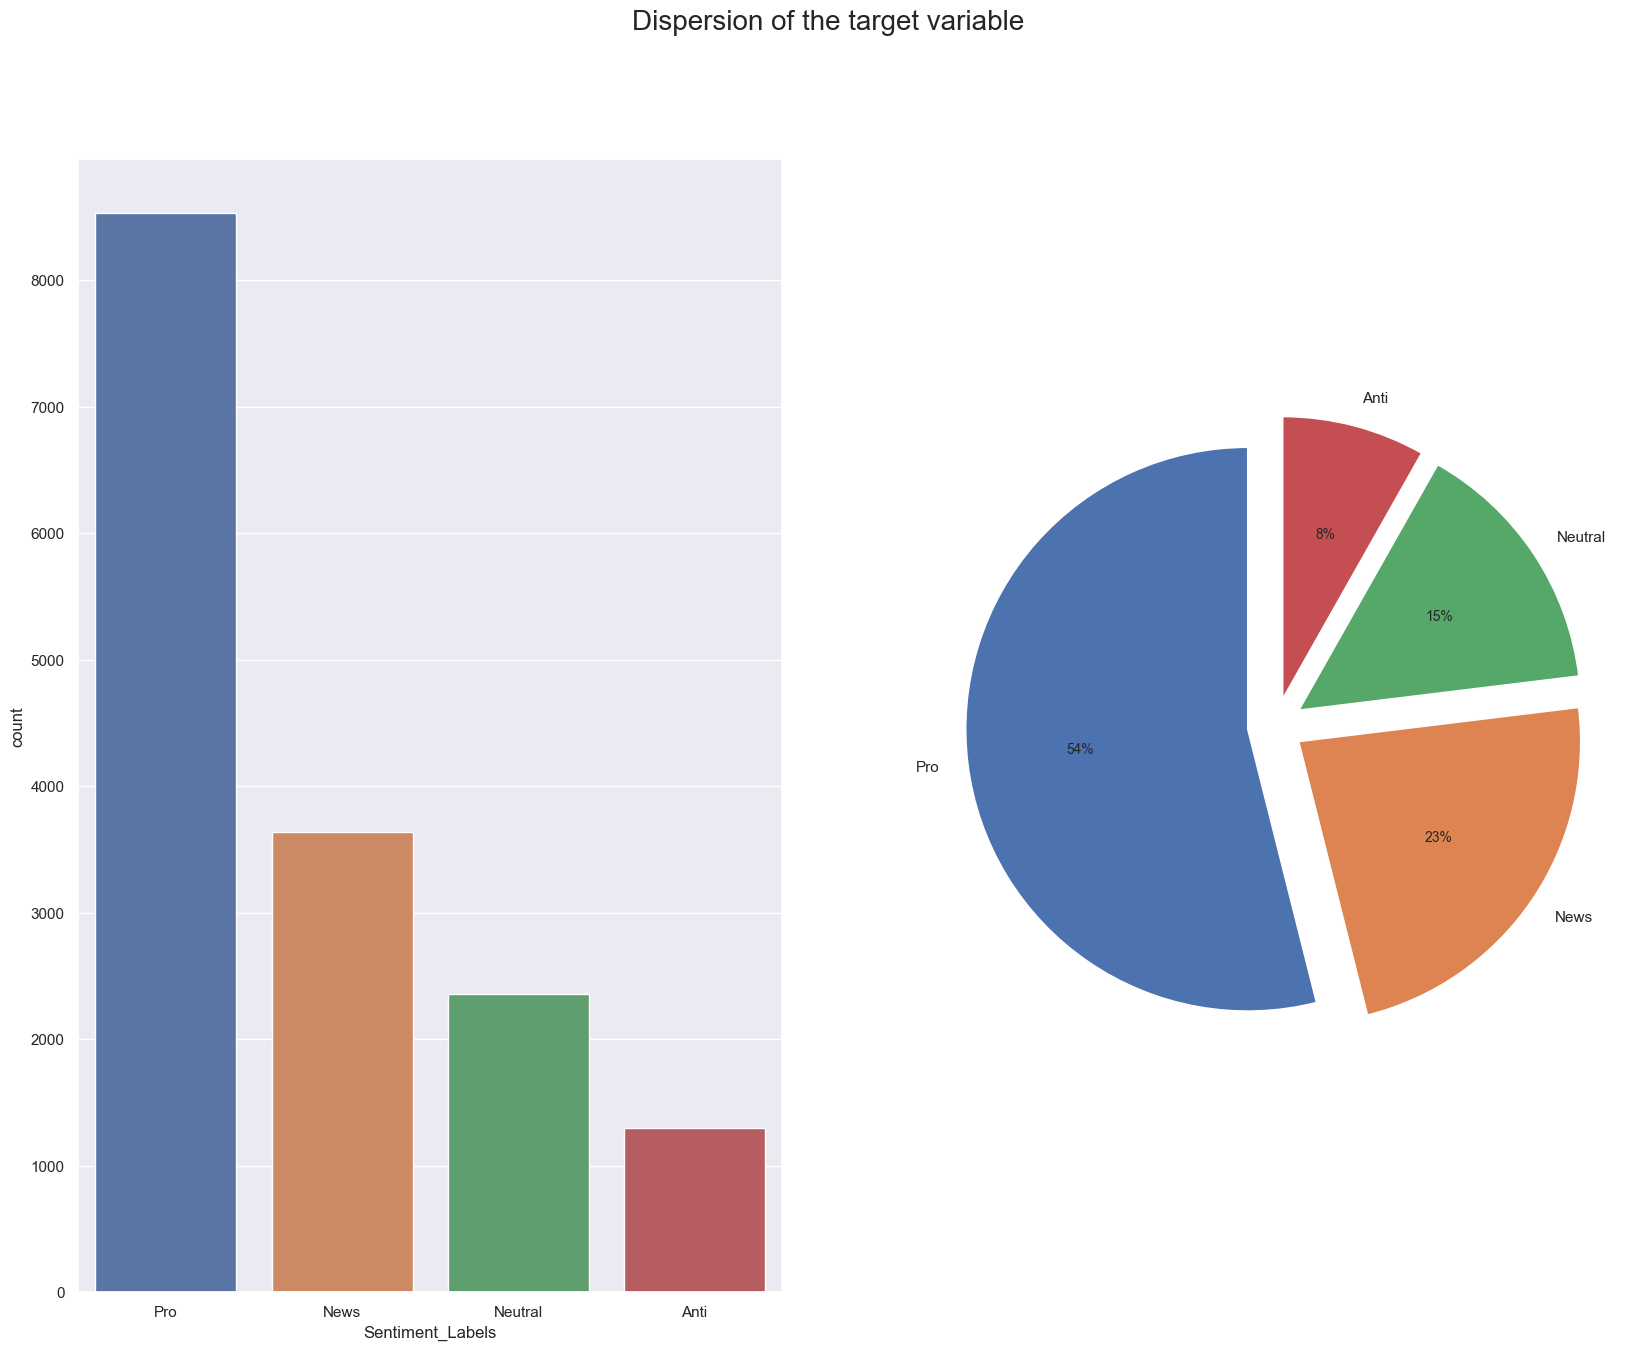

In [296]:
# Display target distribution

print("Percentage contribution:\n",train_eda.Sentiment_Labels.value_counts(normalize=True)*100)

fig, axes = plt.subplots(ncols=2, 
                         nrows=1, 
                         figsize=(20, 15), 
                         dpi=100)

sns.countplot(train_eda['Sentiment_Labels'], ax=axes[0])

code_labels=['Pro', 'News', 'Neutral', 'Anti']
axes[1].pie(train_eda['Sentiment_Labels'].value_counts(),
            labels= code_labels,
            autopct='%1.0f%%',
            startangle=90,
            explode = (0.1, 0.1, 0.1, 0.1))

fig.suptitle('Dispersion of the target variable', fontsize=20)
plt.show()

In [297]:
# Get the length of each message for each class
train_eda['text_length'] = train_eda['message'].apply(lambda x: len(x))
train_eda.head()

,sentiment,message,tweetid,Sentiment_Labels,text_length
0,1,"PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yeLvcEFXkC via @mashable",625221,Pro,140
1,1,It's not like we lack evidence of anthropogenic global warming,126103,Pro,62
2,2,RT @RawStory: Researchers say we have three years to act on climate change before it’s too late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT…,698562,News,140
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change https://t.co/44wOTxTLcD,573736,Pro,99
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #ElectionNight",466954,Pro,122


#### 3.2.2 Visualize tweet length for each class 

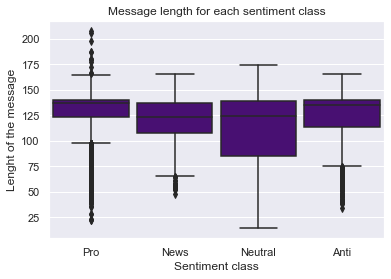

In [298]:
sns.boxplot(x=train_eda['Sentiment_Labels'], y=train_eda['text_length'], data=train_eda, width = 0.9, color = 'indigo')
plt.ylabel('Lenght of the message')
plt.xlabel('Sentiment class')
plt.title('Message length for each sentiment class')
plt.show()

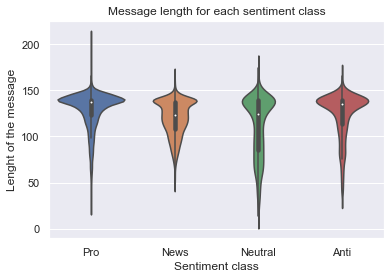

In [299]:
# Count the text length for each class type
sns.violinplot(x="Sentiment_Labels", y="text_length", data=train_eda)
plt.ylabel('Lenght of the message')
plt.xlabel('Sentiment class')
plt.title('Message length for each sentiment class')
plt.show()

##### Quick observations:
* Our target data, including the feature message, has no missing values.

* There is a significant disparity in sentiment groups.

* Sentiment class '1' (Pro) leads the graph with almost 54% of the vote, while class '-1' (Anti) comes in second with 8%.

* Both the upper and lower bounds of Sentiment Class Pro have outliers.

#### 3.4 Investigate the feature variable

We want to obtain a better understanding of the message and what it includes at this point in order to draw useful conclusions about our target variable.

#### 3.4.1 Sentiment Analysis


The process of sentiment analysis finds the underlying emotions in a piece of text. It is the process of categorizing literature into good, negative, or neutral categories. The values range from 1 to -1, with positive emotions decreasing from 1 to -1 and neutral emotion remaining at 0.

---
![Alt_text](https://editor.analyticsvidhya.com/uploads/61727sentiment-fig-1-689.jpeg)



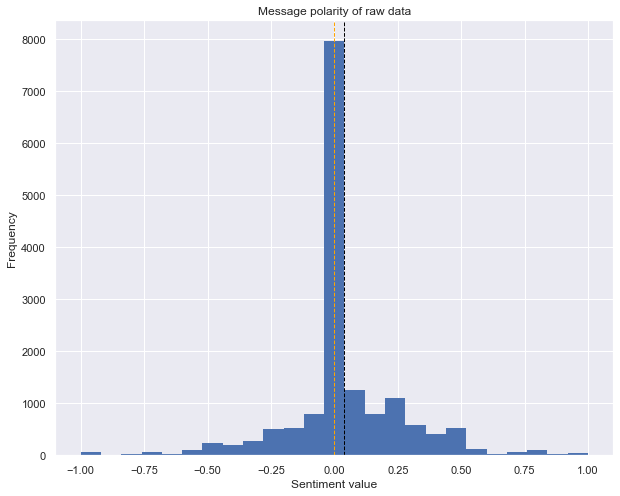

In [300]:
#Compare the sentiment analysis from raw data


train_eda['polarity']=train_eda['message'].apply(lambda x:
                                             TextBlob(x).sentiment.polarity)

plt.figure(figsize=[10, 8])
plt.hist(train_eda['polarity'], bins=25, linewidth=0)
plt.gca().set(title='Message polarity of raw data',
              ylabel='Frequency', xlabel = 'Sentiment value')
plt.axvline(train_eda['polarity'].mean(), color='black',
            linestyle='dashed', linewidth=1)
plt.axvline(train_eda['polarity'].median(), color='orange',
            linestyle='dashed', linewidth=1)

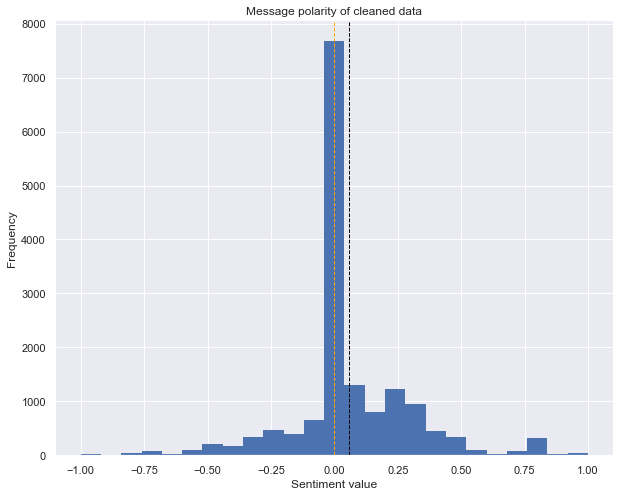

In [301]:
#Compare the sentiment analysis from cleaned data

# Convert the cleaned message from list to string
train_eda['message'] = train['message'].str.join(' ')

train['polarity']=train_eda['message'].apply(lambda x:
                                             TextBlob(x).sentiment.polarity)

plt.figure(figsize=[10, 8])
plt.hist(train['polarity'], bins=25, linewidth=0)
plt.gca().set(title='Message polarity of cleaned data',
              ylabel='Frequency', xlabel = 'Sentiment value')
plt.axvline(train['polarity'].mean(), color='black',
            linestyle='dashed', linewidth=1)
plt.axvline(train['polarity'].median(), color='orange',
            linestyle='dashed', linewidth=1)

#### Observations

- Positively biased feelings, with the mean being higher than the median.
- The majority of tweets are of a neutral nature.
- Although cleaned data has a higher mean than raw data, the central tendency for both shows a similar trend.
- This guarantees that we didn't dilute the behavior of our data during the cleaning process.

#### 3.5 Investigative  text analysis
From here, we'll delve further into our text, looking into each term and its frequency of occurrence individually.

---

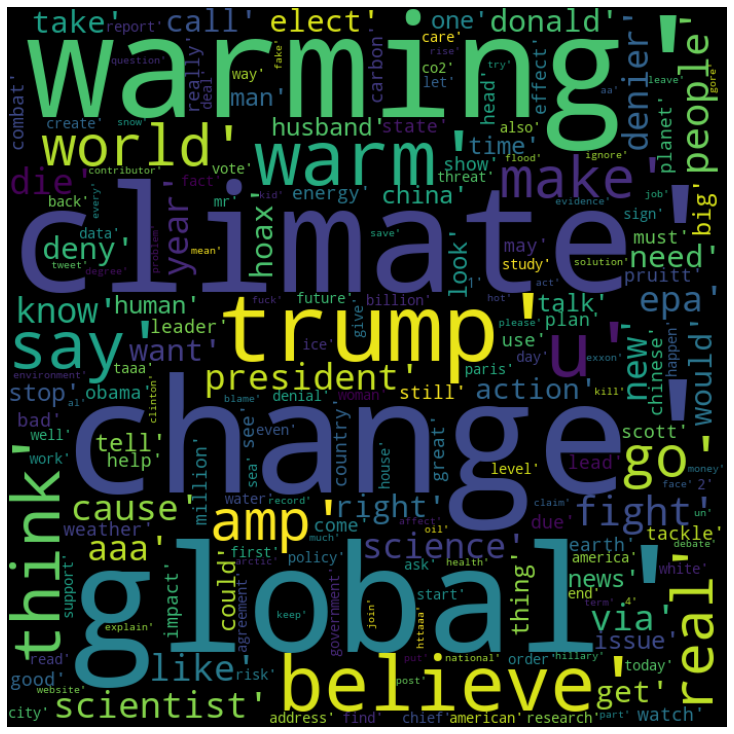

In [302]:
# WordCloud for cleaned data
words = train['message']
allwords = []
for wordlist in words:
    allwords += wordlist
    
mostcommon = FreqDist(allwords).most_common(10000)
wordcloud = WordCloud(width=700, height=700, background_color=
                      'black').generate(str(mostcommon))
fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

#### 3.5.1 visualizing the text by sentiment

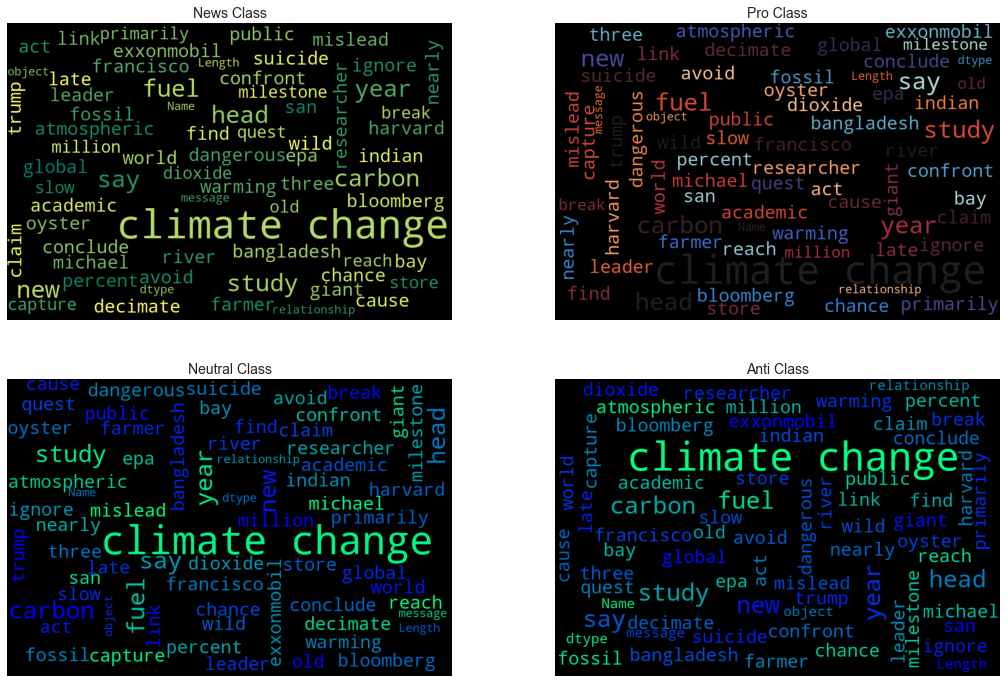

In [303]:
# Convert list to strings for each sentiment class
news = train['message'][train_eda['sentiment']==2].str.join(' ')
neutral = train['message'][train_eda['sentiment']==2].str.join(' ')
pro = train['message'][train_eda['sentiment']==2].str.join(' ')
anti = train['message'][train_eda['sentiment']==2].str.join(' ')

#Visualize each sentiment class

fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))

news_wordcloud = WordCloud(width=900, height=600, background_color='black', colormap='summer').generate(str(news))
axis[0, 0].imshow(news_wordcloud)
axis[0, 0].set_title('News Class',fontsize=14)
axis[0, 0].axis("off") 

neutral_wordcloud = WordCloud(width=900, height=600, background_color='black', colormap='winter', min_font_size=10).generate(str(neutral))
axis[1, 0].imshow(neutral_wordcloud)
axis[1, 0].set_title('Neutral Class',fontsize=14)
axis[1, 0].axis("off") 

pro_wordcloud = WordCloud(width=900, height=600, background_color='black', colormap='icefire', min_font_size=10).generate(str(pro))
axis[0, 1].imshow(pro_wordcloud)
axis[0, 1].set_title('Pro Class',fontsize=14)
axis[0, 1].axis("off") 

anti_wordcloud = WordCloud(width=900, height=600, background_color='black', colormap='winter', min_font_size=10).generate(str(anti))
axis[1, 1].imshow(anti_wordcloud)
axis[1, 1].set_title('Anti Class',fontsize=14)
axis[1, 1].axis("off") 

plt.show()

#### 3.5.2 Extract the top  most used words

#### - Extract the hastags

In [304]:
# Get hashtags from raw data

train_eda = pd.read_csv('train.csv')
train_eda['no_stopwords'] = train_eda['message'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

hashtag = [item for item in train_eda['no_stopwords'].str.split() if item[0].startswith('#')]
hashtag = sum(hashtag, [])
count = nltk.FreqDist(hashtag)  
hashtag = pd.DataFrame({'hashtags': list(count.keys()),
                       'count': list(count.values())})
hashtag = hashtag.nlargest(20, columns="count")
hashtag['hashtags'] = hashtag['hashtags'].map(lambda x: remove_punc(str(x))).str.lower().str.strip()
hashtag = hashtag.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
hashtag = (hashtag.groupby("hashtags").agg({"count": np.sum}))
hashtag = hashtag.sort_values(by='count', ascending=True)
hashtag = hashtag.drop(index="")
hashtag.index = hashtag.index.str.capitalize()

hashtag.sort_values(by='count', ascending=False).head()

,count
hashtags,
Climate,156
Change,136
Global,40
Warming,21
Trump,15


#### - Visualizing the data

In [305]:
fig = px.bar(hashtag, x='count', y=hashtag.index, color='count', title='Top 15 Hashtags in the whole data',
             template='plotly_white', labels={'ngram': 'Bigram', 'count': 'Count'}).update_xaxes(categoryorder='total ascending')
fig.show()


#### - Visualizing in a tree map view

In [306]:
fig = px.treemap(hashtag, title='Treemap chart by Top 15 Hashtags in the whole data',
                 path=[hashtag.index], values = 'count',color='count', color_continuous_scale=px.colors.sequential.GnBu)
fig.show()

##### Quick observation
- Climate, Change, Global, and warming are the top four hashtags, which is to be expected given that these are the important phrases in ensuring that tweets are easily found
- According to  [this article](https://www.azocleantech.com/article.aspx?ArticleID=3), there is a link between climate change and global warming, which explains why the hashtags "global" and "warming" are in the top four.



#### 3.5.3 visualizing the data by sentiment

In [307]:
#Start-off by sorting the dataframe for each sentiment class

# News
news_hashtag = [item for item in train_eda['no_stopwords'][train_eda['sentiment'] == 2].str.split() if item[0].startswith('#')]
news_hashtag = sum(news_hashtag, [])
count = nltk.FreqDist(news_hashtag)  
news_hashtag = pd.DataFrame({'news_hashtags': list(count.keys()),
                       'count': list(count.values())})
news_hashtags = news_hashtag.nlargest(10, columns="count")
news_hashtags = news_hashtags.drop(index=17)
news_hashtags['news_hashtags'] = news_hashtags['news_hashtags'].map(lambda x: remove_punc(str(x))).str.strip()
news_hashtags['news_hashtags'] = news_hashtags['news_hashtags'].str.capitalize()
news_hashtags = news_hashtags.sort_values(by='count', ascending=False)

# Pro
pro_hashtag = [item for item in train_eda['no_stopwords'][train_eda['sentiment'] == 1].str.split() if item[0].startswith('#')]
pro_hashtag = sum(pro_hashtag, [])
count = nltk.FreqDist(pro_hashtag)  
pro_hashtag = pd.DataFrame({'pro_hashtags': list(count.keys()),
                       'count': list(count.values())})
pro_hashtags = pro_hashtag.nlargest(10, columns="count")
pro_hashtags['pro_hashtags'] = pro_hashtags['pro_hashtags'].map(lambda x: remove_punc(str(x))).str.lower().str.strip()
pro_hashtags = (pro_hashtags.groupby("pro_hashtags").agg({"count": np.sum}))
pro_hashtags.index = pro_hashtags.index.str.capitalize()
pro_hashtags = pro_hashtags.sort_values(by='count', ascending=True)

# Neutral
neut_hashtag = [item for item in train_eda['no_stopwords'][train_eda['sentiment'] == 0].str.split() if item[0].startswith('#')]
neut_hashtag = sum(neut_hashtag, [])
count = nltk.FreqDist(neut_hashtag)  
neut_hashtag = pd.DataFrame({'neutral_hashtags': list(count.keys()),
                       'count': list(count.values())})
neutral_hashtags = neut_hashtag.nlargest(10, columns="count")
neutral_hashtags = neutral_hashtags.drop(index=4)
neutral_hashtags['neutral_hashtags'] = neutral_hashtags['neutral_hashtags'].map(lambda x: remove_punc(str(x))).str.lower().str.strip()
neutral_hashtags = (neutral_hashtags.groupby("neutral_hashtags").agg({"count": np.sum}))
neutral_hashtags.index = neutral_hashtags.index.str.capitalize()
neutral_hashtags = neutral_hashtags.sort_values(by='count', ascending=False)

# Anti
anti_hashtag = [item for item in train_eda['no_stopwords'][train_eda['sentiment'] == -1].str.split() if item[0].startswith('#')]
anti_hashtag = sum(anti_hashtag, [])
count = nltk.FreqDist(anti_hashtag)  
anti_hashtag = pd.DataFrame({'anti_hashtags': list(count.keys()),
                       'count': list(count.values())})
anti_hashtags = anti_hashtag.nlargest(10, columns="count")
anti_hashtags['anti_hashtags'] = anti_hashtags['anti_hashtags'].map(lambda x: remove_punc(str(x))).str.strip()
anti_hashtags['anti_hashtags'] = anti_hashtags['anti_hashtags'].str.capitalize()
anti_hashtags = anti_hashtags.sort_values(by='count', ascending=True)


#### - Ploting the graph

In [308]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=2, cols=2, start_cell="bottom-left")
fig = make_subplots(
    rows=2, cols=2,
    specs=[[{}, {}],
           [{}, {}]],
    subplot_titles=("Anti Hashtags","Neutral Hashtags", "Pro Hashtags", "News_hashtags"))


fig.add_trace(go.Bar(y=anti_hashtags['count'], x= anti_hashtags["anti_hashtags"]),
              row=1, col=1)

fig.add_trace(go.Bar(x=neutral_hashtags.index, y=neutral_hashtags['count']),
              row=1, col=2)

fig.add_trace(go.Bar(x=pro_hashtags.index, y=pro_hashtags["count"]),
              row=2, col=1)

fig.add_trace(go.Bar(x=news_hashtags["news_hashtags"], y=news_hashtags["count"]),
              row=2, col=2)

fig.update_layout(height=700,width = 900, showlegend=False, title_text="Top hashtags comparison for different sentiment classes")

fig.show()

##### Quick observation
- Climate, Change, Global, and warming are the top four hashtags, which is to be expected given that these are the important phrases in ensuring that tweets are easily found
- According to  [this article](https://www.azocleantech.com/article.aspx?ArticleID=3), there is a link between climate change and global warming, which explains why the hashtags "global" and "warming" are in the top four.
- The anti hastag group uses the word "faked" as one of their top four most often used words to demonstrate that they do not believe in global warming.

### 5.5 Named Entity Recognition
- in the section we would determine the names of the persons and organizations who are most frequently mentioned in each sentiment category.

(Named Entity Recognition (NER) is a technique that parses a sentence or a block of text for entities that may be classified as names, organizations, locations, quantities, monetary values, percentages, and so on. Only names, locations, and organizations were incorporated in traditional NER algorithms. They may now be dynamically taught to extract more than only the entities listed earlier. If a chunk of entities is located, NER is a simple but effective method )

#### 5.5.1 Named Entity Recognition (Person)

In [309]:
train['sent_labels']  = train['sentiment'].map({-1: 'Anti',0:'Neutral', 1:'Pro', 2:'News'})
train.head(3)
nlp = en_core_web_sm.load()
nlp.max_length = 4000000

In [310]:
train_a = train[train['sent_labels'].isin(['Anti','Neutral','Pro','News'])]
tokens = nlp(''.join(str(train_a['message'].tolist())))
items = [word.text for word in tokens.ents]

person_list = []
for ent in tokens.ents:
    if ent.label_ =='PERSON':
         person_list.append(ent.text)

person_counts = Counter(person_list).most_common()

df_a = pd.DataFrame(person_counts, columns=['person','count'])
df_a['person'] = df_a['person'].str.capitalize()

df_a.head(5)

,person,count
0,Clinton,106
1,Trumps,19
2,Dana,16
3,Bush,10
4,Malcolm,10


In [311]:
fig = px.treemap(df_a, path=['person'],title='Treemap chart by Top Persons in the whole data',
                 values='count', color= "count")
 
fig.show()

In [312]:
#PEOPLE INCLUDED IN PRO SENTIMENT
train_pro = train[train['sent_labels'] == 'Anti']
tokens = nlp(''.join(str(train_pro['message'].tolist())))
items = [word.text for word in tokens.ents]

person_list = []
for ent in tokens.ents:
    if ent.label_ =='PERSON':
         person_list.append(ent.text)

person_counts = Counter(person_list).most_common()

df_pro = pd.DataFrame(person_counts, columns=['person','count'])
df_pro['person'] = df_pro['person'].str.capitalize()

df_pro.head(5)

,person,count
0,Clinton,5
1,Bush,3
2,300k,1
3,678mil,1
4,Any1,1


In [313]:
fig = px.treemap(df_pro, path=['person'],title='Treemap chart by Top Persons in the Pro Sentiment Section',
                 values='count', color= "count")
 
fig.show()

In [314]:
#PEOPLE INCLUDED IN ANTI SENTIMENT
train_anti = train[train['sent_labels'] == 'Anti']
tokens = nlp(''.join(str(train_anti['message'].tolist())))
items = [word.text for word in tokens.ents]

person_list = []
for ent in tokens.ents:
    if ent.label_ =='PERSON':
         person_list.append(ent.text)

person_counts = Counter(person_list).most_common()

df_anti = pd.DataFrame(person_counts, columns=['person','count'])
df_anti['person'] = df_anti['person'].str.capitalize()

df_anti.head()

,person,count
0,Clinton,5
1,Bush,3
2,300k,1
3,678mil,1
4,Any1,1


In [315]:
fig = px.treemap(df_anti, path=['person'],title='Treemap chart by Top Persons in the Anti Sentiment Section',
                 values='count', color= "count")
 
fig.show()

In [316]:
#PEOPLE INCLUDED IN NEUTRAL SENTIMENT
train_neutral = train[train['sent_labels'] == 'Neutral']
tokens = nlp(''.join(str(train_neutral['message'].tolist())))
items = [word.text for word in tokens.ents]

person_list = []
for ent in tokens.ents:
    if ent.label_ =='PERSON':
         person_list.append(ent.text)

person_counts = Counter(person_list).most_common()

df_neutral = pd.DataFrame(person_counts, columns=['person','count'])
df_neutral['person'] = df_neutral['person'].str.capitalize()

df_neutral.head()

,person,count
0,Clinton,11
1,Taylor,6
2,Malcolm,5
3,Bush,3
4,Zinke,3


In [317]:
fig = px.treemap(df_neutral, path=['person'],title='Treemap chart by Top Persons in the neutral Sentiment Section',
                 values='count', color= "count")
 
fig.show()

In [318]:
#PEOPLE INCLUDED IN NEWS SENTIMENT
train_news = train[train['sent_labels'] == 'News']
tokens = nlp(''.join(str(train_news['message'].tolist())))
items = [word.text for word in tokens.ents]

person_list = []
for ent in tokens.ents:
    if ent.label_ =='PERSON':
         person_list.append(ent.text)

person_counts = Counter(person_list).most_common()

df_news = pd.DataFrame(person_counts, columns=['person','count'])
df_news['person'] = df_news['person'].str.capitalize()

df_news.head()

,person,count
0,Trumps,12
1,Dana,8
2,Clinton,7
3,Johnson,4
4,Kennedy,4


In [319]:
fig = px.treemap(df_pro, path=['person'],title='Treemap chart by Top Persons in the Pro Sentiment Section',
                 values='count', color= "count")
 
fig.show()

#### observations
*
*
*

#### 5.5.2 Named Entity Recognition (ORGANIZATIONS)

In [320]:
#ORGANIZATIONS INCLUDED IN Pro SENTIMENT
train_oa = train[train['sent_labels'].isin(['Anti','Neutral','Pro','News'])]
tokens = nlp(''.join(str(train_oa['message'].tolist())))
items = [word.text for word in tokens.ents]

org_list = []
for ent in tokens.ents:
    if ent.label_ =='ORG':
        org_list.append(ent.text)

org_counts = Counter(org_list).most_common()

df_org_a = pd.DataFrame(org_counts, columns=['organization','count'])
df_org_a['organization'] = df_org_a['organization'].str.upper()

df_org_a.head(5)

,organization,count
0,EPA,366
1,CNN,46
2,GOP,37
3,EU,23
4,SEC,18


In [321]:
#visualizing the data
fig = px.treemap(df_org_a, path=['organization'],title='Treemap chart by Top organizations in the whole data',
                 values='count', color= "count")
 
fig.show()

In [322]:
#ORGANIZATIONS INCLUDED IN Pro SENTIMENT
train_pro = train[train['sent_labels'] == 'Pro']
tokens = nlp(''.join(str(train_pro['message'].tolist())))
items = [word.text for word in tokens.ents]

org_list = []
for ent in tokens.ents:
    if ent.label_ =='ORG':
        org_list.append(ent.text)

org_counts = Counter(org_list).most_common()

df_org_pro = pd.DataFrame(org_counts, columns=['organization','count'])
df_org_pro['organization'] = df_org_pro['organization'].str.upper()

df_org_pro.head()

,organization,count
0,EPA,205
1,GOP,27
2,SENATE,12
3,CNN,10
4,SEC,9


In [323]:
fig = px.pie(df_org_pro, values='count', names='organization',
             title='Pie chart by Top organizations in the Pro Sentiment Section',)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [324]:
#ORGANIZATIONS INCLUDED IN NEWS SENTIMENT
train_news = train[train['sent_labels'] == 'News']
tokens = nlp(''.join(str(train_news['message'].tolist())))
items = [word.text for word in tokens.ents]

org_list = []
for ent in tokens.ents:
    if ent.label_ =='ORG':
        org_list.append(ent.text)

org_counts = Counter(org_list).most_common()

df_org = pd.DataFrame(org_counts, columns=['organization','count'])
df_org['organization'] = df_org['organization'].str.upper()

df_org.head()

,organization,count
0,EPA,133
1,CNN,23
2,EU,12
3,CBS,7
4,SEC,6


In [325]:
fig = px.pie(df_org, values='count', names='organization',
             title='Pie chart by Top organizations in the News Sentiment Section',)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [326]:
#ORGANIZATIONS INCLUDED IN NEUTRAL SENTIMENT
train_neutral = train[train['sent_labels'] == 'Neutral']
tokens = nlp(''.join(str(train_neutral['message'].tolist())))
items = [word.text for word in tokens.ents]

org_list = []
for ent in tokens.ents:
    if ent.label_ =='ORG':
        org_list.append(ent.text)

org_counts = Counter(org_list).most_common()

df_org_neutral= pd.DataFrame(org_counts, columns=['organization','count'])
df_org_neutral['organization'] = df_org_neutral['organization'].str.upper()

df_org_neutral.head()

,organization,count
0,EPA,18
1,CNN,6
2,GOP,4
3,NATO,3
4,EU,3


In [327]:
fig = px.pie(df_org_neutral, values='count', names='organization',
             title='Pie chart by Top organizations in the Neutral Sentiment Section',)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [328]:
#ORGANIZATIONS INCLUDED IN ANTI SENTIMENT
train_anti = train[train['sent_labels'] == 'Anti']
tokens = nlp(''.join(str(train_anti['message'].tolist())))
items = [word.text for word in tokens.ents]

org_list = []
for ent in tokens.ents:
    if ent.label_ =='ORG':
        org_list.append(ent.text)

org_counts = Counter(org_list).most_common()

df_org_anti = pd.DataFrame(org_counts, columns=['organization','count'])
df_org_anti['organization'] = df_org_anti['organization'].str.capitalize()
df_org_anti['organization'] = df_org_anti['organization'].str.upper()


df_org_anti.head()

,organization,count
0,Epa,10
1,Cnn,7
2,Nato,2
3,Sec,2
4,Gop,1


In [329]:
fig = px.pie(df_org_anti, values='count', names='organization',
             title='Pie chart by Top organizations in the Anti Sentiment Section',)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

<a id="six"></a>
## 6. Classification Models
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Classification Models ⚡ |
| :--------------------------- |
| In this section, we'll look at different models, try to explain them, and learn about their benefits and drawbacks. |

---

*  Decision Tree Classifier<a id='DS'></a>
*  RandomForest Classifier<a id='random'></a>
*  LinearSVC(Support Vector Classifier)<a id='svc'></a>
*  LGBMClassifier(Light Gradient Boosting Machine Classifier)<a id='LGBM'></a>
*  Logistic Regression
*  Stochastic
*  Support Vector Classifier
*  XGboost

<a id="seven"></a>
## 7. Data or feature Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section we would be: We will be looking at one of feature selection in text data namely the `tfidfVectorizer`. |

---
### 7.1 `TF-IDF`

<a id='tfidf'></a>

Term Frequency — Inverse Text Frequency (TF-IDF) is a statistic that attempts to better quantify how essential a term is for a document while also considering its relationship to other papers in the same corpus.
This is done by counting the number of times a term appears in a document as well as the number of times the same word appears in other documents in the corpus.
`vocabulary_` Is a dictionary that turns each word in the text into a feature index in the matrix, with a feature index for each unique token.

#### -  Creating our X and y Metrics


In [330]:
X = train_data['message']
y = train_data['sentiment']
X_test = test_data['message']

#### - Splitting data into train and validation sets

Separating data into training and validation sets is an important part of evaluating our models. 
In our case we will randomly split the train data into 70% train and 30% validation. 
After our model is trained with the train data we then use it to make predictions for the target using the validation set,Because the data in the validation set already contains known values for the target variable this will make it easy  for us to asses our model's accuracy.

In [331]:
# Splitting the data into 70% train and 30% validation set
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=.3,shuffle=True, stratify=y, random_state=11)

<a id='Pipelines'></a>

### 6.2 Pipelines

A 'pipeline' is a tool that applies a set of transformations and a final estimator in a sequential manner. The pipeline's intermediate phases implement fit and transform techniques, whereas the final estimator simply has to implement fit. Pipelines will assist us in transforming the train, validation, and test data, as well as training our models, in our scenario.

Because our models can only process numerical data, the first step is to create a pipeline that converts text data to numeric data. In this notebook, we'll focus on two feature engineering methods that we'll use to convert text data to numeric data: TfidfVectorizer and Word2Vec, and then we'll train our models using these pipelines.

We'll be utilizing 'tfidfVectorizer' to produce features for pipelines.

<a id='classifiers'></a>

#### 6.2.1 Building classification  pipelines


In [332]:
# DecisionTreeClassifier Pipeline
tree = Pipeline([('tfidf', TfidfVectorizer()),('tree', DecisionTreeClassifier()),])


# RandomForestClassifier Pipeline
rfc = Pipeline([('tfidf', TfidfVectorizer()), ('rfc', RandomForestClassifier())])


# LinearSVC Pipeline
Lsvc = Pipeline([('tfidf', TfidfVectorizer()),
                     ('scv', LinearSVC()),])
 
# LGBMClassifier Pipeline
lgbm = Pipeline([('tfidf', TfidfVectorizer()), ('lgbm', LGBMClassifier())])

# Logistic Regression pipeline
logreg = Pipeline([('tfidf', TfidfVectorizer()),('logistic', LogisticRegression()),])


# SGD Classifier pipeline
SGD = Pipeline([('tfidf', TfidfVectorizer()), ('SGD', SGDClassifier())])

# Support Vector Classifier Pipeline
svc = Pipeline([('tfidf', TfidfVectorizer()), ('SVC', SVC())])

<a id='raw_tweets'></a>

#### 6.3 Training models

Each model is trained using a unique pipeline that takes raw text input, converts it to numeric data, and sets the default parameters for the classifier.

In [333]:
# training the decision tree pipeline
tree.fit(X_train, y_train)

# training the RandomForest pipleline
rfc.fit(X_train, y_train)


# training the LinearSVC pipeline
Lsvc.fit(X_train, y_train)  

# training the LGBMClassifier Pipleine
lgbm.fit(X_train, y_train)

# training the logistic regression pipeline
logreg.fit(X_train, y_train)

# training the SGD Classifier
SGD.fit(X_train, y_train)

# training the support vector classifier
svc.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('SVC', SVC())])

<a id='raw_tweets'></a>

#### 6.4 Model evalution

##### - Performance Metrics for model evaluation

The F1 Score, which is the number of true cases for each label, will be used to assess our models.

- ####  Precision
The ratio of accurately predicted positive observations to total expected positive observations is known as precision.

$$ Precision = \frac{TP}{TP \space + FP} = \frac{TP}{Total \space Predicted \space Positive} $$

- #### Recall
The capacity of the classifier to discover all the positive samples is known as recall.

$$ Recall = \frac{TP}{TP \space + FN} = \frac{TP}{Total \space Actual \space Positive}$$

- #### F1 Score
In machine learning, the F1-score is one of the most crucial assessment measures. It effectively summarizes a model's prediction ability by combining two variables that would otherwise be at odds - precision and recall. 

(Weighted average of precision and recall.)

$$F_1 = 2 \times \frac {Precision \space \times \space Recall }{Precision \space + \space Recall }$$

[2] "News": Tweets regarding climate change that are based on facts.

[1] "Pro": Tweets in favor of man-made climate change.

[0] "Neutral": tweets are those that neither support nor refute climate change theories.

[-1] "Anti" : tweets are those who do not believe in man-made climate change.

#### - To evaluate the base models we first start with making predictions for the validation set

In [334]:
# Making validations set predicions

tree_prediction = tree.predict(X_val) # DecisionTreeClassifier predictions
rfc_prediction = rfc.predict(X_val) # RandomForestClassifier predictions
Lsvc_prediction = Lsvc.predict(X_val) # LinearSVClassifier Predictions
lgbm_prediction = lgbm.predict(X_val) # LGBMClassifier Model predictions
logreg_prediction = logreg.predict(X_val) # Logistic regression predictions
SGD_prediction = SGD.predict(X_val) # SGD Classifier predictions
SVC_prediction = svc.predict(X_val) # Support vector machine predictions

#### 6.4.1 Evalution of DecisionTreeClassifier


In [335]:
#Evaluatung with confusion matrix
print(confusion_matrix(y_val, tree_prediction))

[[  97   76  163   53]
 [  57  265  336   48]
 [  95  264 1858  342]
 [  20   60  361  651]]



Decision Tree
               precision    recall  f1-score   support

          -1       0.36      0.25      0.29       389
           0       0.40      0.38      0.39       706
           1       0.68      0.73      0.70      2559
           2       0.60      0.60      0.60      1092

    accuracy                           0.60      4746
   macro avg       0.51      0.49      0.50      4746
weighted avg       0.59      0.60      0.60      4746



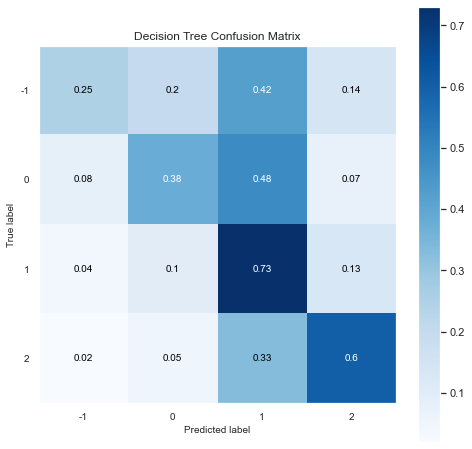

In [336]:
#visualizing the results
print('\nDecision Tree\n', classification_report(y_val, tree_prediction))
plot_confusion_matrix(y_val, tree_prediction, normalize=True,figsize=(8,8),cmap='Blues')
plt.title('Decision Tree Confusion Matrix')
plt.show()

### Key Observations
A classification report is used to assess the accuracy of a classification algorithm's predictions.

+ We can observe that pro climate change has a precision of 68 percent, which is higher, followed by news, neutral, and anti climate change.

+ In comparison to the models we've tried, the precision for anti-climate change and neutral is lower.

+ The pro-climate class has the greatest recall value of 73 percent.

+ The recall of neutral is as low as 4%.



The recall score for each sentiment class is shown in the confusion matrix heatmap.

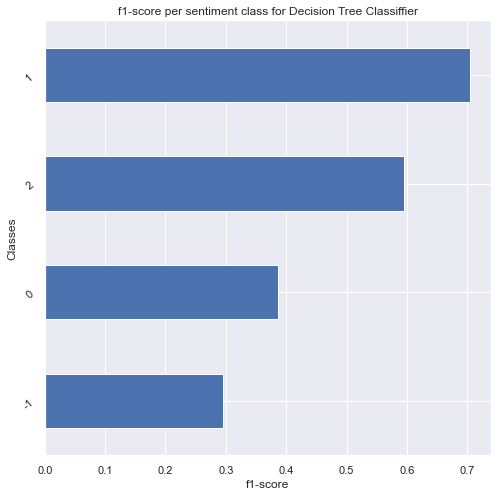

In [339]:
# # Visual represetation of of the f1 score for each class
report_tree = classification_report(y_val, tree_prediction, output_dict=True)
df_tree = pd.DataFrame(report_tree).transpose()
df_tree.drop(['accuracy'], inplace = True)
df_tree.sort_values(by=['f1-score'],ascending=True, inplace = True)
df_tree.drop(['weighted avg','macro avg'])['f1-score'].plot(kind='barh', figsize = (8,8))
plt.xlabel('f1-score')
plt.ylabel('Classes')
plt.yticks(rotation = 40)
plt.title('f1-score per sentiment class for Decision Tree Classiffier')
plt.show()

### Key Observations

The f1 score for each sentiment class using the Decision Tree classifier is shown in the bar graph above.

- We can observe that the decision tree model performed a great job classifying 'Pro climate change' tweets, followed by 'News' and 'Neutral' tweets, in that order.

- With a f1 score of less than 0.3, the Decision Tree classifier performed a bad job classifying 'Anti Climate Change' tweets.

- Given the imbalance in our train data, where 'Anti climate change' tweets only account for 8% of all tweets in the train dataset, poor categorization of 'Anti climate change' tweets is predicted.

In [340]:
# Print the overall accuracy
decison_tree_acc = round(accuracy_score(y_val, tree_prediction),4)
print(f'\nOverall Accuracy score for Decision Tree : {decison_tree_acc}')
decision_tree_f1 = round(f1_score(y_val, tree_prediction, average="weighted"),4)
print(f'\nWeighted avg f1 score Decision Tree {decision_tree_f1}' )



Overall Accuracy score for Decision Tree : 0.6049

Weighted avg f1 score Decision Tree 0.5984


#### 6.4.2  Evalution of RandomForestClassifier

In [341]:
#Evaluatung with confusion matrix
print('\nRandomForestClassifier\n', confusion_matrix(y_val, rfc_prediction))



RandomForestClassifier
 [[  41   29  297   22]
 [   3  211  455   37]
 [   1   48 2325  185]
 [   0    6  319  767]]



RandomForestClassifier
               precision    recall  f1-score   support

          -1       0.91      0.11      0.19       389
           0       0.72      0.30      0.42       706
           1       0.68      0.91      0.78      2559
           2       0.76      0.70      0.73      1092

    accuracy                           0.70      4746
   macro avg       0.77      0.50      0.53      4746
weighted avg       0.73      0.70      0.67      4746



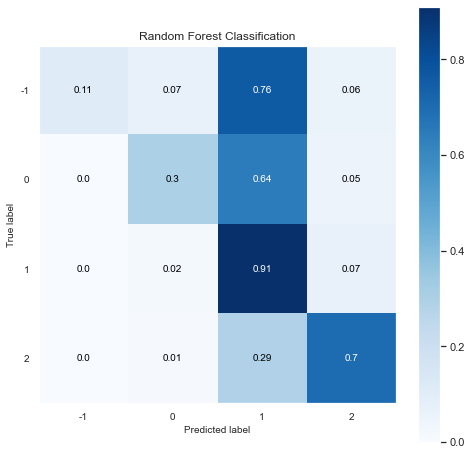

In [342]:
print('\nRandomForestClassifier\n', classification_report(y_val, rfc_prediction))
plot_confusion_matrix(y_val, rfc_prediction, normalize=True,figsize=(8,8),cmap='Blues')
plt.title('Random Forest Classification')
plt.show()

#### Key Observations

- We can observe that anti-climate has a precision of 91 percent, neutral has a precision of 72 percent, and news has a precision of 76 percent, which is greater than 'Decision Tree.'

- When compared to 'Decision Tree,' the recall values for the pro-climate class are 91 percent and news is 70 percent.

- When compared to 'Decision Tree,' anti-climate recalls decreased.

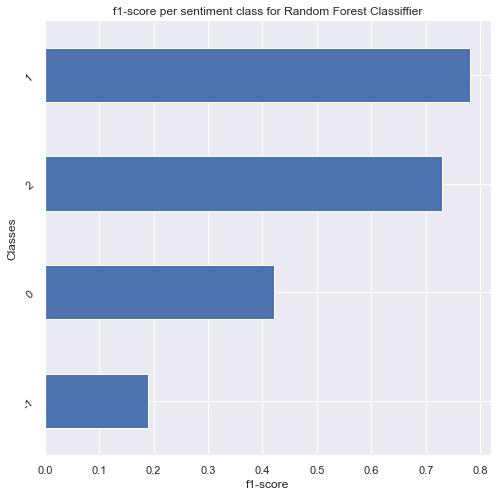

In [343]:
# # Visual represetation of of the f1 score for each class
report_rfc = classification_report(y_val, rfc_prediction, output_dict=True)
df_rfc = pd.DataFrame(report_rfc).transpose()
df_rfc.drop(['accuracy'], inplace = True)
df_rfc.sort_values(by=['f1-score'],ascending=True, inplace = True)
df_rfc.drop(['weighted avg','macro avg'])['f1-score'].plot(kind='barh', figsize = (8,8))
plt.xlabel('f1-score')
plt.ylabel('Classes')
plt.yticks(rotation = 40)
plt.title('f1-score per sentiment class for Random Forest Classiffier')
plt.show()

#### Important Points to Consider

The f1 score for each sentiment class using the Random Forest classifier is shown in the graph above.

- We can observe that the Random Forest model performed a better job classifying 'Pro climate change' tweets and 'News' tweets than the Decision tree model, with both sentimetents scoring over 0.7. with 'Neutral' tweets following after that.

- With a f1 score lower than the one we acquired using the 'Decision Tree' classifier, the Random Forest classifier performed a bad job classifying 'Anti climate Change' tweets.

In [344]:
random_forest_acc = round(accuracy_score(y_val, rfc_prediction),4)
print(f'\nOveral accuracy score for RandomForestClassifier :{random_forest_acc}')
random_forest_f1 = round(f1_score(y_val, rfc_prediction, average="weighted"),4)
print(f'\nWeighted f1 score for RandomForestClassifier : {random_forest_f1}')


Overal accuracy score for RandomForestClassifier :0.7046

Weighted f1 score for RandomForestClassifier : 0.6671


<a id='basemodels'></a>
# Classification Models
We're going to look at the following models,

*  Decision Tree Classifier<a id='DS'></a>
*  RandomForest Classifier<a id='random'></a>
*  LinearSVC(Support Vector Classifier)<a id='svc'></a>
*  LGBMClassifier(Light Gradient Boosting Machine Classifier)<a id='LGBM'></a>
*  Logistic Regression
*  Stochastic
*  Support Vector Classifier

<a id='tree'></a>
## Tree-based Models for Classification

<a id='DC'></a>
### Decision Tree Classifier

![1*bcLAJfWN2GpVQNTVOCrrvw.png](https://miro.medium.com/max/688/1*bcLAJfWN2GpVQNTVOCrrvw.png)
Decision Trees (DTs) are  non-parametric supervised learning methods used for classification and regression. Decision trees learn from data to approximate a sine curve with a set of if-then-else decision rules. The deeper the tree, the more complex the decision rules and the fitter the model.

Decision tree builds classification or regression models in the form of a tree structure. It breaks down data by partitioning it into subsets after each decision while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes. A decision node has two or more branches. Leaf node represents a classification or decision. The topmost decision node in a tree which corresponds to the best predictor called root node. Decision trees can handle both categorical and numerical data.

Visual representation of a `Decision Tree`
![1*WerHJ14JQAd3j8ASaVjAhw.jpeg](https://miro.medium.com/max/963/1*WerHJ14JQAd3j8ASaVjAhw.jpeg)



Decision trees are prone to overfitting. Overfitting happens when the learning algorithm continues to develop hypotheses that reduce training set error at the cost of an increased test set error; One method to tackle overfitting in decision trees is by **prunning**.
There are several approaches used to avoid overfitting in building decision trees namely, 		
- Pre-pruning that stops growing the tree earlier, before it perfectly classifies the training set.
- Post-pruning that allows the tree to perfectly classify the training set, and then post prune the tree. 
Practically, the second approach of post-pruning overfit trees is more successful because it is not easy to precisely estimate when to stop growing the tree.

Decision Trees are building blocks for the next machine learning method we will look into, which is the **Random Forest Classifier**

<a id='random'></a>
### Random Forest Classifier
`Random forest` is a supervised learning algorithm that can be used both for classification and regression. A forest is comprised of a number of individual trees. It is said that the more trees it has, the more robust a forest is, unlike decision trees `Random Forest`  prevents overfitting by creating trees on random subsets  

The Random forest algorithm works in four steps

 1. Selects a number of random samples from a given dataset
 2. Construct a decision tree for each sample and get a prediction result from each decision tree
 3. Perform a vote for each predicted result.
 4. Select the prediction result with the most votes as the final prediction.

a visual representation of a Random Forest classifier is seen in the diagram below
![voting_dnjweq.jpg](https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1526467744/voting_dnjweq.jpg)





## Support Vector Classification(LinearSVC)
SVM or Support Vector Machine is a linear model for classification and regression problems. It can solve linear and non-linear problems and work well for many practical problems. The idea of SVM is simple: The algorithm creates a line or a hyperplane which separates the data into classes as seen in the diagram below

![1*dh0lzq0QNCOyRlX1Ot4Vow.jpeg](https://miro.medium.com/max/963/1*dh0lzq0QNCOyRlX1Ot4Vow.jpeg)

To better explain the concept of `SVM` we will look at a case of two classes.

**To find the best line seperating the classes**

The `SVM` algorithm finds the points closest to the line from both the classes.These points are called support vectors, then it compute the distance between the line and the support vectors, This distance is called the margin. Our goal is to maximize the margin.

In a case for more than two classes the goal is to find the the best hyperplane that seperates the classes.
The hyperplane for which the margin is maximum is the optimal hyperplane.

Below is a visual representation of how `SVMs` work

<p float="left">
  <img src="https://miro.medium.com/max/880/1*VDATmWG1E1ZNg7hdasOh5g.png" width="300" />
  <img src="https://miro.medium.com/max/880/1*AMR3v-jCvUMXPUtQskzxmQ.png" width="300" />
  <img src="https://miro.medium.com/max/880/1*irg_jfdAar9gfe0j-Q04vQ.png" width="300" />
</p>





## Light Gradient Boosting Machine(LightGBM)
LightGBM is a gradient boosting framework that also uses a tree based learning algorithm. LightGBM differes from other tree based algorithms in the sense that it grows trees vertifically while other algorithms grow them horizontally, this means that Light GBM grows trees leaf-wise while other algorithm grow level-wise.

LightGBM will choose the leaf with max delta loss to grow. When growing the same leaf, Leaf-wise algorithm can reduce more loss than a level-wise algorithm.
The diagrams below explain the implementation of LightGBM and other boosting algorithms


How Light GBM works![1*AZsSoXb8lc5N6mnhqX5JCg.png](https://miro.medium.com/max/875/1*AZsSoXb8lc5N6mnhqX5JCg.png)

How other tree based algorithms work
![1*whSa8rY4sgFQj1rEcWr8Ag.png](https://miro.medium.com/max/875/1*whSa8rY4sgFQj1rEcWr8Ag.png)

some advantages of LightGBM framework include
- Faster training speed and higher efficiency.
- Lower memory usage.
- Better accuracy.
- Support of parallel and GPU learning.
- Capable of handling large-scale data

## Logistic Regression

**Logistic regression** is a statistical method for predicting binary classes. The outcome or target variable is dichotomous in nature. Dichotomous means there are only two possible classes. For example, it can be used for cancer detection problems. It computes the probability of an event occurrence.

Logistic Regression uses the probability of a data point to belonging to a certain class to classify each datapoint to it's best estimated class

Logistic regression has been rated as the best performing model for linearly separable data especially if it's predicting binary data(Yes & NO or 1 & 0), and performs better when there's no class imbalance.

The figure below is the sigmoid function logistic regression models use to make predictions:
![1*QY3CSyA4BzAU6sEPFwp9ZQ.png](http://miro.medium.com/max/725/1*QY3CSyA4BzAU6sEPFwp9ZQ.png)



Advantages
* Convenient probability scores for observations (probability of each outcome is transformed into a classification);
* Not a major issue if there is collinearity among features (much worse with linear regression).

Disadvantages
* Can overfit when data is unbalanced (i.e.: we have far more observations in one class than the other).
* Doesn't handle large number of categorical variables well.

# Closing the comet experiment

In [337]:
# close the experiment
#experiment.end()

In [338]:
#experiment.display()